In [40]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.getcwd())
import scanpy as sc
import pandas as pd
import anndata as ad

In [2]:
os.chdir('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/stereo_seq/zebrafish_rawdata/')

In [3]:
adata_st = ad.read_h5ad("./spatial_sixtime_slice_stereoseq.h5ad")

In [8]:
adata_st.obs

,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters,spatial_x,spatial_y,slice,bin_annotation,colors,layer_annotation,layer_colors,time
DNB_-8175_8955_1,DNB,3117,1178,15,10757.25,1118.00,4,Spinal Cord Ventral Region,#8BA3C7,Spinal Cord,#de77ae,24hpf
DNB_-8115_8070_1,DNB,3066,761,5,10694.25,188.75,4,Epidermis,#32692b,Epidermal,#fdb863,24hpf
DNB_-8025_8865_1,DNB,1451,576,8,10599.75,1023.50,4,Pronephros,#A67EB7,Mesoderm,#4575b4,24hpf
DNB_-7920_8385_1,DNB,2373,828,3,10489.50,519.50,4,"Musculature System, Yolk Syncytial Layer",#6F94CD,Mesoderm,#4575b4,24hpf
DNB_-7860_8385_1,DNB,1919,713,3,10426.50,519.50,4,"Musculature System, Yolk Syncytial Layer",#6F94CD,Mesoderm,#4575b4,24hpf
...,...,...,...,...,...,...,...,...,...,...,...,...
DNB_3675_15450,DNB,485,330,7,3613.25,1625.00,1,deep blastomere,#BDCDFF,Blastodisc,#cca4e3,3.3hpf
DNB_3480_15420,DNB,661,416,7,3418.25,1595.00,1,deep blastomere,#BDCDFF,Blastodisc,#cca4e3,3.3hpf
DNB_3885_15480,DNB,620,392,7,3823.25,1655.00,1,deep blastomere,#BDCDFF,Blastodisc,#cca4e3,3.3hpf
DNB_3705_15480,DNB,597,388,7,3643.25,1655.00,1,marginal blastomere,#E5A84B,Blastodisc,#cca4e3,3.3hpf


In [9]:
confusion_matrix = pd.crosstab(adata_st.obs['slice'], adata_st.obs['time'])
print(confusion_matrix)

time   3.3hpf  5.25hpf  10hpf  12hpf  18hpf  24hpf
slice                                             
1        1167        0      0      0      0      0
4           0        0      0      0      0   5271
8           0        0      0   2081   3048      0
10          0      563      0      0      0      0
11          0        0   1036      0      0      0


In [5]:
adata_st.obs.bin_annotation.value_counts()

Nervous System                                1764
Notochord                                     1267
Musculature System, Yolk Syncytial Layer       770
Segmental Plate, Tail Bud                      651
Somite                                         640
Yolk Syncytial Layer                           488
Fast Muscle Cell                               482
Spinal Cord Dorsal Region                      477
Neural Crest                                   467
deep blastomere                                466
Neural Rod                                     443
Adaxial Cell                                   438
Spinal Cord Ventral Region                     408
superficial blastomere                         392
Pronephros                                     385
Forebrain                                      381
Erythroid Lineage Cell                         356
marginal blastomere                            309
EVL                                            272
Periderm                       

In [10]:
adata_st_s1 = adata_st[adata_st.obs.slice==1].copy()
adata_st_s11 = adata_st[adata_st.obs.slice==11].copy()
adata_st_s10 = adata_st[adata_st.obs.slice==10].copy()
adata_st_s8_12 = adata_st[adata_st.obs.time=="12hpf"].copy()
adata_st_s8_18 = adata_st[adata_st.obs.time=="18hpf"].copy()
adata_st_s4 = adata_st[adata_st.obs.slice==4].copy()

In [11]:
adata_sc1 = ad.read_h5ad("zf3_scRNA.h5ad")
adata_sc4 = ad.read_h5ad("zf24_scRNA.h5ad")
adata_sc8_12 = ad.read_h5ad("zf12_scRNA.h5ad")
adata_sc8_18 = ad.read_h5ad("zf18_scRNA.h5ad")
adata_sc10 = ad.read_h5ad("zf5_scRNA.h5ad")
adata_sc11 = ad.read_h5ad("zf10_scRNA.h5ad")

In [73]:
confusion_matrix = pd.crosstab(adata_st.obs['slice'], adata_st.obs['bin_annotation'])
print(confusion_matrix)

bin_annotation  EVL  Hypoblast  Margin  Presumptive Mesoderm  \
slice                                                          
1               324         26      18                   220   
2               186         35      90                    82   
3               208         31       9                   100   
4                93         21       9                    37   
5               158          8      53                    53   
6               217         17       9                    79   
7               260         34      40                    62   
8               260         35     105                    34   
9               119         18      15                    47   
10              272         24      22                    47   
11              231         36      30                    88   
12               77          4       6                    17   

bin_annotation  Presumptive Mesoderm, Presumptive Ectoderm  \
slice                                    

In [14]:
set(adata_sc11.obs.celltype_new.unique().to_list())-set(adata_st_s11.obs.bin_annotation.unique().to_list())

{'Endoderm',
 'Mesoderm, Polster',
 'Neural Plate, Neural Keel',
 'Paraxial Mesoderm, Tail Bud',
 'Periderm, YSL',
 'UND'}

In [13]:
set(adata_st_s11.obs.bin_annotation.unique().to_list())-set(adata_sc11.obs.celltype_new.unique().to_list())

{'Paraxial Mesoderm, Neural Keel',
 'Periderm',
 'Posterior Neural Keel',
 'Segmental Plate, Tail Bud',
 'Yolk Syncytial Layer'}

In [15]:
set(adata_sc11.obs.celltype_new.unique().to_list())&set(adata_st_s11.obs.bin_annotation.unique().to_list())

{'Anterior Neural Keel', 'Notochord'}

In [ ]:
['Anterior Neural Keel', 'Notochord','Periderm,YSL']
#["Neural Rod",'Polster','Segmental Plate, Tail Bud','Notochord','Lateral Plate Mesoderm','Periderm']

In [19]:
adata_st_s10.obs.layer_annotation.value_counts()

Epidermal                                     272
Presumptive Mesoderm, Presumptive Ectoderm    100
Proliferative Like Cell                        69
Mesoderm                                       47
Yolk Syncytial Layer                           29
Hypoblast                                      24
Margin                                         22
Name: layer_annotation, dtype: int64

In [16]:
set(adata_sc10.obs.celltype_new.unique().to_list())-set(adata_st_s10.obs.bin_annotation.unique().to_list())

{'Apoptotic Like Cell',
 'Dorsal Margin',
 'EVL_krt97',
 'Hsp High Expression',
 'Presumptive Ectoderm',
 'Presumptive Endoderm, Presumptive Mesoderm',
 'UND'}

In [17]:
set(adata_st_s10.obs.bin_annotation.unique().to_list())-set(adata_sc10.obs.celltype_new.unique().to_list())

{'Hypoblast',
 'Margin',
 'Presumptive Mesoderm, Presumptive Ectoderm',
 'Proliferative Like Cell',
 'Yolk Syncytial Layer'}

In [18]:
set(adata_sc10.obs.celltype_new.unique().to_list())&set(adata_st_s10.obs.bin_annotation.unique().to_list())

{'EVL', 'Presumptive Mesoderm'}

In [91]:
['EVL', 'Presumptive Mesoderm','Margin','Presumptive Mesoderm, Presumptive Ectoderm']

In [32]:
set(adata_sc8_12.obs.celltype_new)&set(adata_st_s8_12.obs.bin_annotation)

{'Lateral Plate Mesoderm',
 'Neural Rod',
 'Notochord',
 'Periderm',
 'Polster',
 'Segmental Plate, Tail Bud',
 'YSL_Periderm'}

In [33]:
set(adata_st_s8_12.obs.bin_annotation)-set(adata_sc8_12.obs.celltype_new)

{'Adaxial Cell', 'Optic Vesicle', 'Somite', 'Yolk Syncytial Layer'}

In [35]:
set(adata_sc8_12.obs.celltype_new)-set(adata_st_s8_12.obs.bin_annotation)

{'Anterior Neural Rod', 'Endoderm', 'Neural Crest', 'Posterior Neural Rod'}

In [ ]:
['Lateral Plate Mesoderm',
 'Neural Rod',
 'Notochord',
 'Polster',
 'Segmental Plate, Tail Bud',
 'Yolk Syncytial Layer, Periderm',#'Periderm_tp63, Otic Placode, YSL',
 'Periderm',#'Periderm_foxi3b','Periderm_krt17'
]

In [27]:
adata_sc8_12.obs.celltype_new = adata_sc8_12.obs.celltype_new.to_list()
adata_st_s8_12.obs.bin_annotation = adata_st_s8_12.obs.bin_annotation.to_list()

In [30]:
adata_sc8_12.obs.loc[adata_sc8_12.obs.celltype_new=='Periderm_tp63, Otic Placode, YSL', 
                     'celltype_new'] = 'YSL_Periderm'
adata_st_s8_12.obs.loc[adata_st_s8_12.obs.bin_annotation=='Yolk Syncytial Layer, Periderm', 
                     'bin_annotation'] = 'YSL_Periderm'
adata_sc8_12.obs.loc[adata_sc8_12.obs.celltype_new.isin(['Periderm_foxi3b','Periderm_krt17']), 
                     'celltype_new'] = 'Periderm'

In [36]:
adata_st_s8_12.obs.bin_annotation.value_counts()

Neural Rod                   443
Adaxial Cell                 438
Segmental Plate, Tail Bud    292
Somite                       265
Polster                      203
Yolk Syncytial Layer         168
Periderm                     132
YSL_Periderm                  80
Optic Vesicle                 45
Notochord                     10
Lateral Plate Mesoderm         5
Name: bin_annotation, dtype: int64

In [37]:
adata_sc8_12.obs.celltype_new.value_counts()

YSL_Periderm                 2747
Anterior Neural Rod          2076
Neural Rod                   1873
Posterior Neural Rod         1801
Segmental Plate, Tail Bud    1426
Lateral Plate Mesoderm        891
Neural Crest                  446
Notochord                     294
Periderm                      280
Endoderm                      229
Polster                        70
Name: celltype_new, dtype: int64

In [89]:
set(adata_st_s8_12.obs.bin_annotation.unique()) &set(adata_sc8_12.obs.celltype_new.unique())

{'Lateral Plate Mesoderm',
 'Neural Rod',
 'Notochord',
 'Periderm',
 'Polster',
 'Segmental Plate, Tail Bud',
 'YSL_Periderm'}

# scanpy #

In [169]:
adata_rna = adata_sc8_18.copy()

In [170]:
sc.pp.filter_genes(adata_rna, min_cells=3)
adata_rna.var['mt'] = adata_rna.var_names.str.startswith('^mt') # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_rna.var['rb'] = adata_rna.var_names.str.startswith('^rp[sl]')
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=['rb'], percent_top=None, log1p=False, inplace=True)

In [171]:
adata_rna

AnnData object with n_obs × n_vars = 9903 × 23620
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'celltype_new', 'clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rb'
    obsm: 'X_umap'
    layers: 'counts'

In [172]:
file_name = 'zebrafish_18'

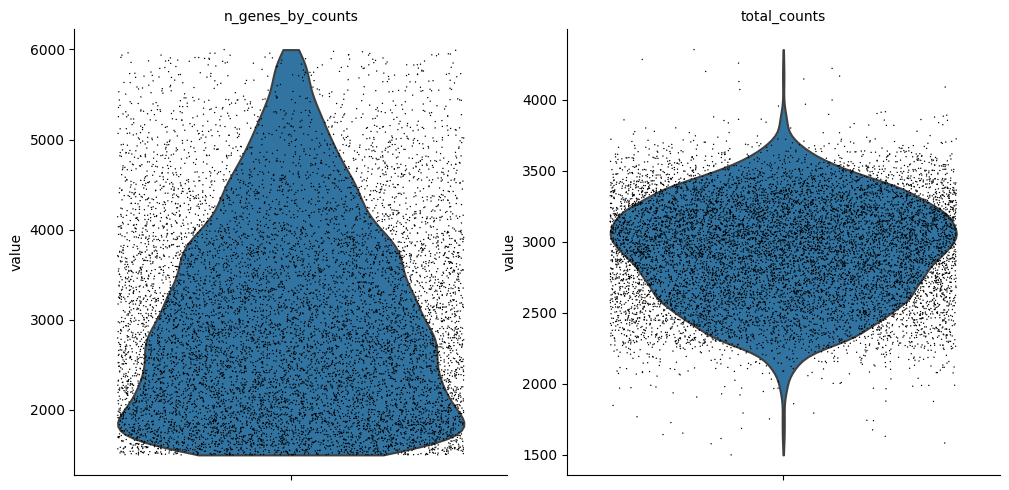

In [173]:
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True,save='_'+file_name+'_scRNA.svg')

In [174]:
adata = adata_rna[adata_rna.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.total_counts > 2000, :]

In [176]:
adata.obs.celltype_new.value_counts()

Periderm_myh9a, Pharynx, YSL                 2358
Central Nervous System                       1878
Segmental Plate, Tail Bud, Nervous System    1489
Primary Neuron                               1050
Neural Crest                                  659
Erythroid Lineage Cell                        497
Cardiovascular System                         457
Floor Plate, Notochord                        388
Lateral Plate Mesoderm, Endothelial Cell      300
Periderm_krt17                                258
Integument                                    256
Otic Placode                                  130
Pronephros                                    107
Hatching Gland                                 37
Name: celltype_new, dtype: int64

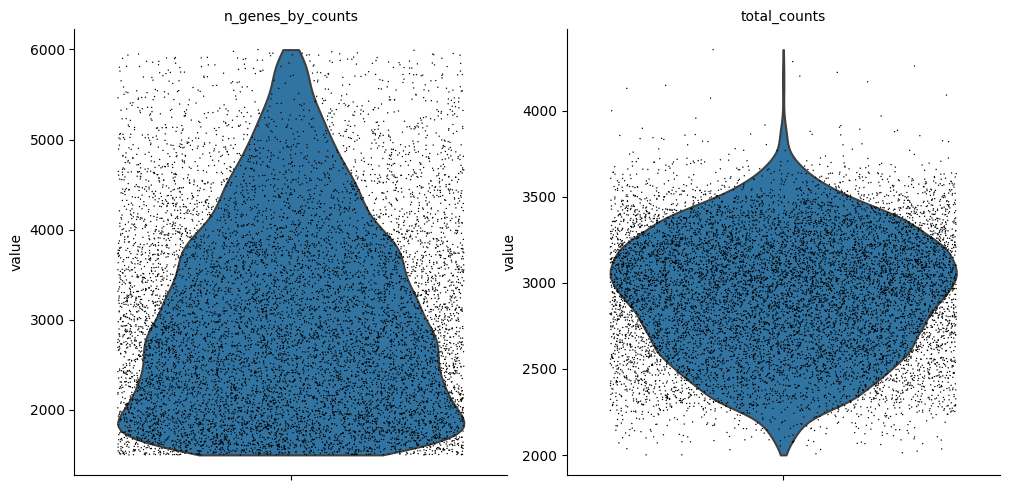

In [177]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True)

In [178]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

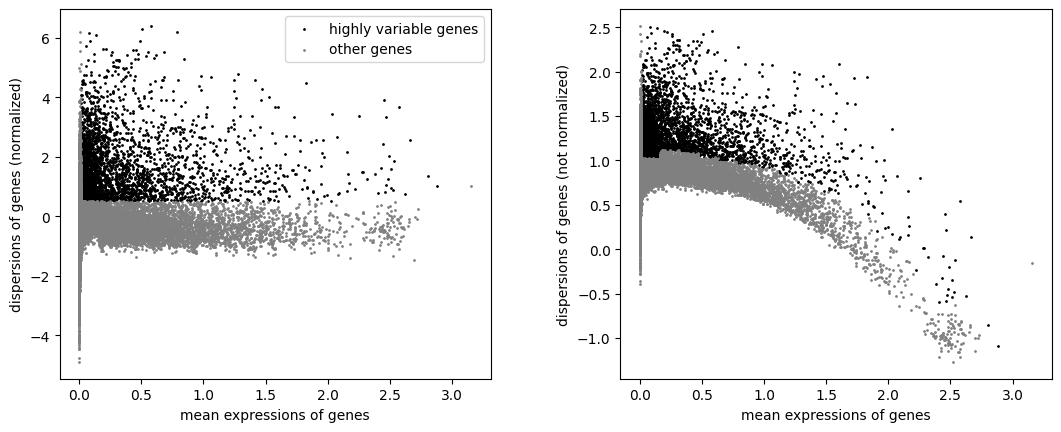

In [179]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata,save='_'+file_name+'_scRNA_hvg.svg')

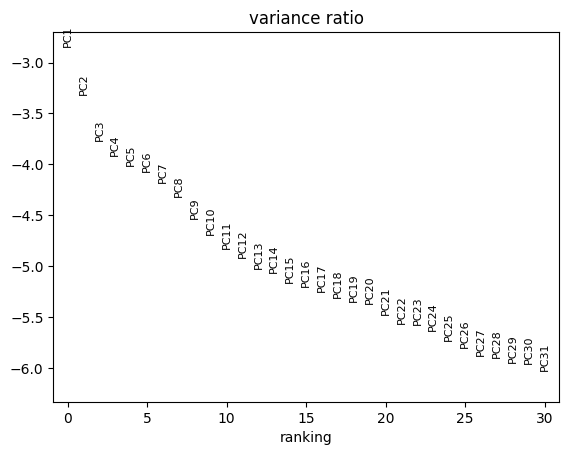

In [180]:
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [181]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)

In [182]:
sc.tl.umap(adata)

In [183]:
sc.tl.leiden(adata,resolution=0.2)

In [185]:
adata.write_h5ad('sc8_18.h5ad')

In [186]:
adata_rna = adata_st_s8_18.copy()

In [187]:
sc.pp.filter_genes(adata_rna, min_cells=3)
adata_rna.var['mt'] = adata_rna.var_names.str.startswith('^mt') # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_rna.var['rb'] = adata_rna.var_names.str.startswith('^rp[sl]')
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=['rb'], percent_top=None, log1p=False, inplace=True)

In [188]:
adata_rna

AnnData object with n_obs × n_vars = 3048 × 15389
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'spatial_x', 'spatial_y', 'slice', 'bin_annotation', 'colors', 'layer_annotation', 'layer_colors', 'time', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rb'
    layers: 'counts', 'scale.data'

In [190]:
file_name = 'zebrafish_18'

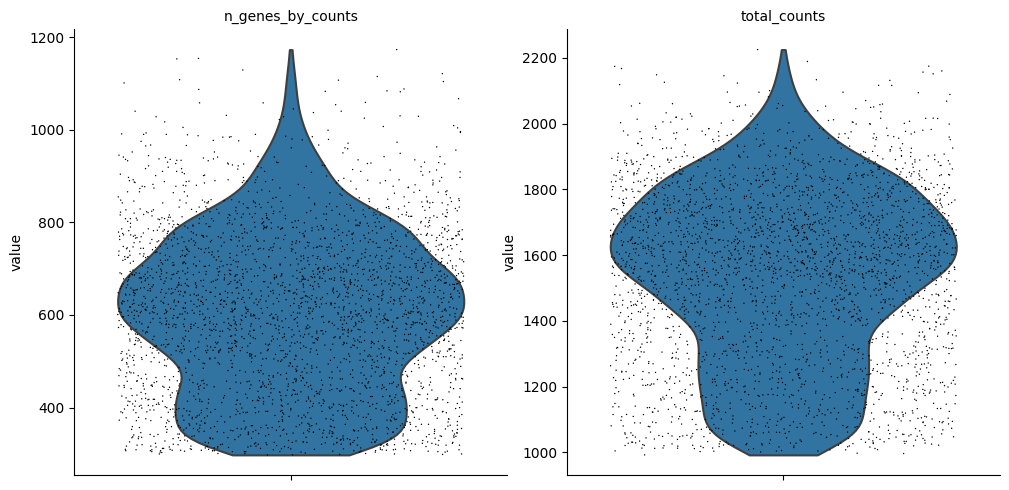

In [191]:
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True,save='_'+file_name+'_stRNA.svg')

In [192]:
adata = adata_rna.copy()

In [193]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

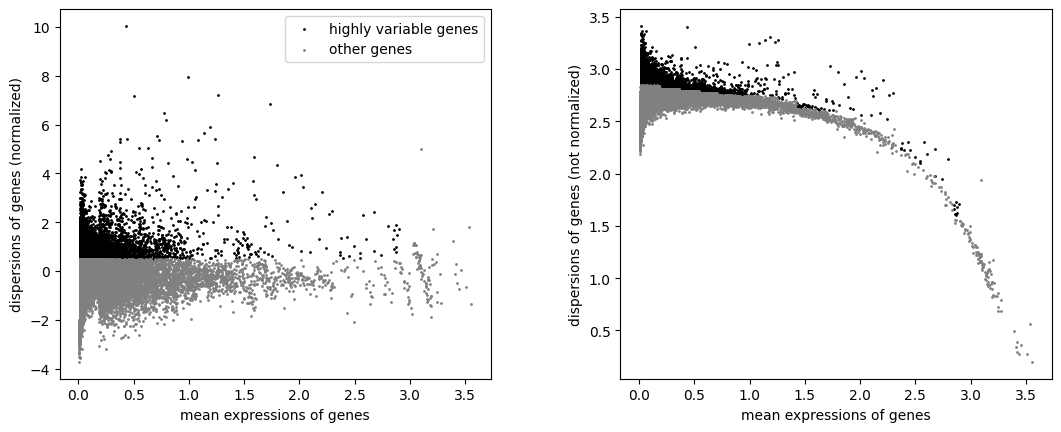

In [194]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata,save='_'+file_name+'_stRNA_hvg.svg')

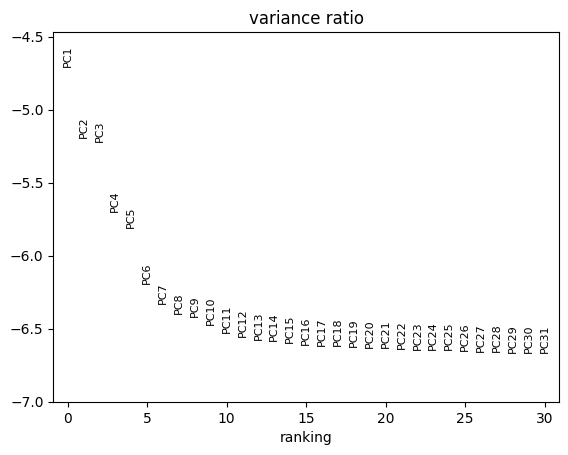

In [195]:
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [202]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=11)

In [203]:
sc.tl.umap(adata)

In [204]:
sc.tl.leiden(adata,resolution=0.2)

In [200]:
adata.obs.bin_annotation.value_counts()

Notochord                         758
Neural Crest                      467
Somite                            375
Erythroid Lineage Cell            356
Nervous System                    316
Forebrain                         298
Angioblastic Mesenchymal Cell     155
Hatching Gland                    130
Neural Crest, Otic Vesicle         61
Yolk Syncytial Layer, Periderm     53
Yolk Syncytial Layer               22
Immature Eye, Midbrain             21
Segmental Plate, Tail Bud          20
Pronephros                         16
Name: bin_annotation, dtype: int64

In [206]:
adata.write_h5ad('st8_18.h5ad')

In [208]:
sc8_18 =ad.read_h5ad('sc8_18.h5ad')
st8_18 =ad.read_h5ad('st8_18.h5ad')

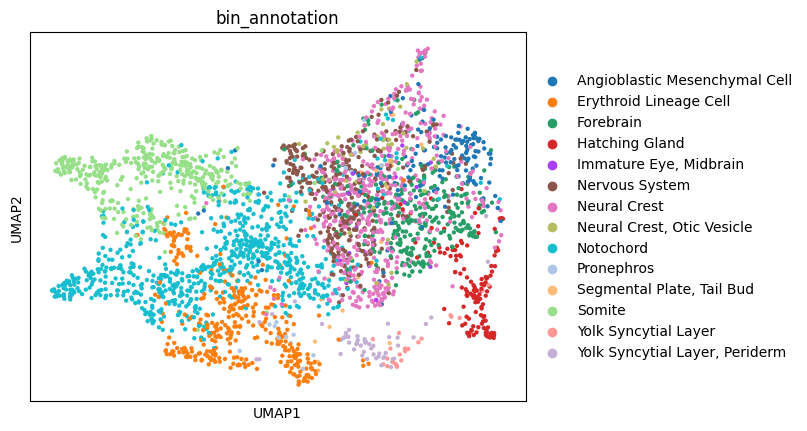

In [212]:
sc.pl.umap(st8_18, color='bin_annotation')

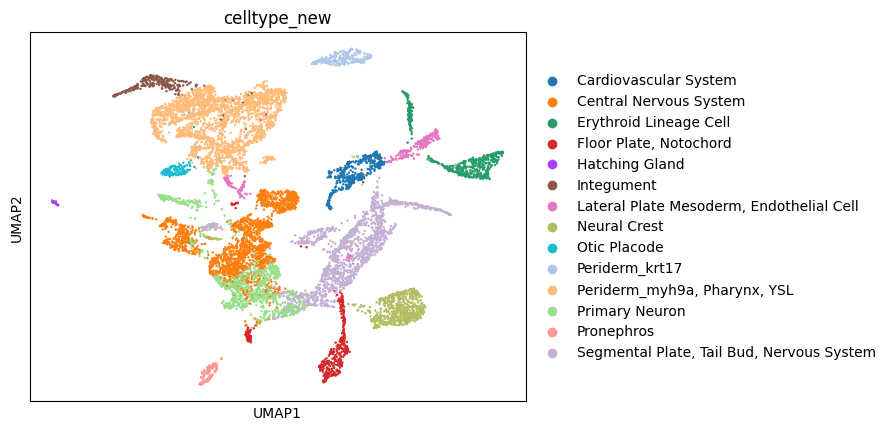

In [213]:
sc.pl.umap(sc8_18, color='celltype_new')

In [229]:
set(st8_18.obs.bin_annotation.unique()) &set(sc8_18.obs.celltype_new.unique())

{'Erythroid Lineage Cell',
 'Hatching Gland',
 'Neural_Crest',
 'Notochord',
 'Pronephros',
 'Segmental_Plate_and_Tail_Bud'}

In [232]:
sc8_18.obs.celltype_new.value_counts()

Periderm_and_YSL                            2358
Central Nervous System                      1878
Segmental_Plate_and_Tail_Bud                1489
Primary Neuron                              1050
Neural_Crest                                 659
Erythroid Lineage Cell                       497
Cardiovascular System                        457
Notochord                                    388
Lateral Plate Mesoderm, Endothelial Cell     300
Periderm_krt17                               258
Integument                                   256
Otic Placode                                 130
Pronephros                                   107
Hatching Gland                                37
Name: celltype_new, dtype: int64

In [231]:
st8_18.obs.bin_annotation.value_counts()

Notochord                        758
Neural_Crest                     528
Somite                           375
Erythroid Lineage Cell           356
Nervous System                   316
Forebrain                        298
Angioblastic Mesenchymal Cell    155
Hatching Gland                   130
Periderm_and_YSL                  75
Immature Eye, Midbrain            21
Segmental_Plate_and_Tail_Bud      20
Pronephros                        16
Name: bin_annotation, dtype: int64

In [216]:
st8_18.obs.bin_annotation = st8_18.obs.bin_annotation.to_list()
sc8_18.obs.celltype_new = sc8_18.obs.celltype_new.to_list()

In [230]:
sc8_18.obs.loc[sc8_18.obs.celltype_new=='Neural Crest', 
                     'celltype_new'] = 'Neural_Crest'
st8_18.obs.loc[st8_18.obs.bin_annotation.isin(['Neural Crest, Otic Vesicle','Neural Crest']), 
                     'bin_annotation'] = 'Neural_Crest'
sc8_18.obs.loc[sc8_18.obs.celltype_new=='Floor Plate, Notochord', 
                     'celltype_new'] = 'Notochord'
sc8_18.obs.loc[sc8_18.obs.celltype_new=='Segmental Plate, Tail Bud, Nervous System', 
                     'celltype_new'] = 'Segmental_Plate_and_Tail_Bud'
st8_18.obs.loc[st8_18.obs.bin_annotation.isin(['Segmental Plate, Tail Bud']), 
                     'bin_annotation'] = 'Segmental_Plate_and_Tail_Bud'
sc8_18.obs.loc[sc8_18.obs.celltype_new=='Periderm_myh9a, Pharynx, YSL', 
                     'celltype_new'] = 'Periderm_and_YSL'
st8_18.obs.loc[st8_18.obs.bin_annotation.isin(['Yolk Syncytial Layer, Periderm',"Yolk Syncytial Layer"]), 
                     'bin_annotation'] = 'Periderm_and_YSL'

In [132]:
adata_st_s8_12

AnnData object with n_obs × n_vars = 2081 × 26628
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'spatial_x', 'spatial_y', 'slice', 'bin_annotation', 'colors', 'layer_annotation', 'layer_colors', 'time'
    layers: 'counts', 'scale.data'

In [125]:
cell_type = list(set(st8_12.obs.bin_annotation.unique()) &set(sc8_12.obs.celltype_new.unique()))

In [127]:
sc8_12 =sc8_12[sc8_12.obs.celltype_new.isin(cell_type)]
st8_12 =st8_12[st8_12.obs.bin_annotation.isin(cell_type)]

In [234]:
st8_18.write_h5ad('st8_18_use.h5ad')
sc8_18.write_h5ad('sc8_18_use.h5ad')

... storing 'bin_annotation' as categorical
... storing 'celltype_new' as categorical
